# Sentiment: 

### Load packages:

In [1]:
using TextAnalysis
using JSON, OAuth, Twitter
using Colors
using ColorSchemes
using JLD
using Statistics
using XLSX
using CSV
using DataFrames
using Dates
using LinearAlgebra
using StatsBase
using MultivariateStats

### Plotting settings:

In [2]:
import Plots
import PyPlot
Plots.pyplot()

plt = PyPlot

SMALL_SIZE = 10
MEDIUM_SIZE = 11
BIGGER_SIZE = 12

plt.rc("font", size=SMALL_SIZE)          # controls default text sizes
plt.rc("axes", titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)    # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

colors = vcat([0 0 0 0], plt.cm.YlOrRd(range(0, stop=1, length=10))[2:end,:]);

### Define some useful functions:

In [3]:
conv_to_hour(date) = dayofyear.(date).*24 .+ hour.(date)
conv_to_minumte(date) = dayofyear.(date).*24.0 .* 60.0 .+ hour.(date) .* 60.0 .+ minute.(date)
conv_to_seconds(date) = dayofyear.(date).*24.0 .* 60.0 .* 60.0 .+ hour.(date) .* 60.0 .* 60.0 .+ minute.(date) .* 60.0 .+ second.(date)
conv_to_hmin(date) = hour.(date) .* 60.0 .+ minute.(date) 

function linreg(x, y; bias_c=true)
    
	X = Array{Float64}(undef, length(x),1)
	Y = Vector{Float64}(undef, length(y))
	X[1:length(x),1] .= x
	Y[1:length(y)] .= y
	sol = llsq(X, Y)
	coeff, bias = sol[1], sol[2]
    
    if bias_c == true
        g1(x) = bias + coeff*x 
        return g1, (coeff, bias)
    end
    
    if bias_c == false
        g2(x) = coeff*x
        return g2, (coeff, bias)
    end
    
end

linreg (generic function with 1 method)

### Load data files:

In [4]:
new_df = XLSX.readxlsx("covid-en-sent.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_1 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, :lang, :sentim_score]);

In [5]:
new_df = XLSX.readxlsx("positive-en-sent.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_2 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, :lang, :sentim_score]);

In [6]:
new_df = XLSX.readxlsx("negative-en-sent.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_3 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, :lang, :sentim_score]);

In [7]:
new_df = XLSX.readxlsx("neutral-en-sent.xlsx")["Sheet1"]
stop_ind = new_df.dimension.stop;

data_tmp = new_df["A2:$stop_ind"];

df_4 = DataFrame(data_tmp,  [:retweet_count, :favorite_count, 
        :created_at, :text, :id_str, :lang, :sentim_score]);

# Plots:

In [8]:
bins=collect(range(0, 1, length=500));

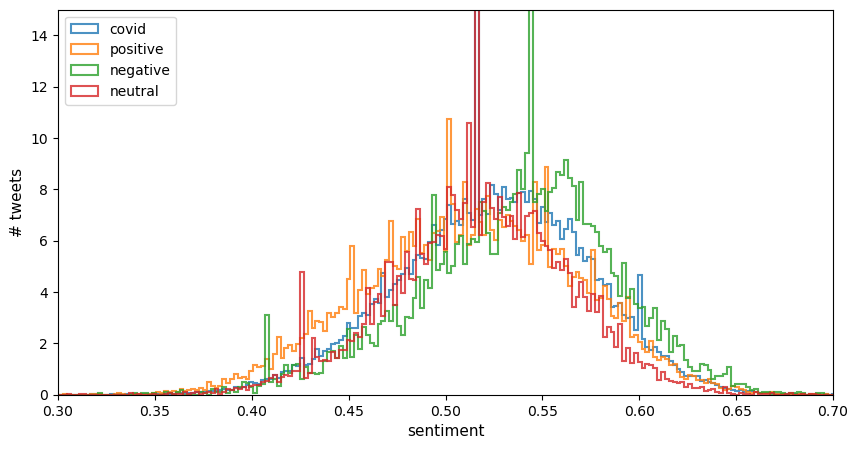

PyObject Text(24.999999999999993, 0.5, '# tweets')

In [9]:
fig, ax = plt.subplots(1,1, figsize=(10, 5))

ax.hist(df_1[:,7], bins=bins, histtype="step", density=true, color="C0", lw=1.5, alpha=0.8, label="covid")
ax.hist(df_2[:,7], bins=bins, histtype="step", density=true, color="C1", lw=1.5, alpha=0.8, label="positive")
ax.hist(df_3[:,7], bins=bins, histtype="step", density=true, color="C2", lw=1.5, alpha=0.8, label="negative")
ax.hist(df_4[:,7], bins=bins, histtype="step", density=true, color="C3", lw=1.5, alpha=0.8, label="neutral")

ax.set_xlim(0.3, 0.7)
ax.set_ylim(0, 15)

ax.legend(loc="upper left", frameon=true, framealpha=0.8, ncol=1)

ax.set_xlabel("sentiment")
ax.set_ylabel("# tweets")

In [10]:
dataset = df_1

dataset[sortperm(dataset[:,7], rev=true)[1:10],4]

10-element Array{Any,1}:
 "He’s still feeding us bad information on a daily basis. At specific hotspots the number of cases taxed medical facilities. Time will prove these were exceptions not the rule. Fauci is directly responsible for shutting down the economy and this will prove worst than COVID-19 https://t.co/wm9va5jDLj"
 "It is simple.\nIf the USA collapses and anarchy\nbegins where will a citizen get health\ncare? \nIf we don't have a country you don't have \na hospital.\nIf there is a revolution more will die than from Covid 19.\nRestart the Economy before the\nGlobalists evil plan destroys us all."
 "So @TeamYouTube in their unending wisdom do not endorse informative/charity videos about Corona/Covid-19. Their dumb ass robots demonitize or even remove any videos that mention it not regarding the context.\nBravo @YouTube, you are the worst."
 "#Coronavirus news fatigue has set in. The coronavirus traffic bump to news sites is pretty much over already - Audience numbers now look 

In [11]:
# todo sentiment based on smiles 